# Estimation

### Make inference about a population parameter based on sample statistic.

### Types:
#### 1. Point Estimation:
Single point estimation of the population parameter. Ex. population means as estimated from the sample mean is $40.

#### 2. Interval Estimation(Confidence Interval):
A range of values within which the population parameter lies with some(x%) confidence. Ex. population mean should lie between $38 - $42, with 95% confidence(x=95)

#### Point Estimation:
A point estimation is a single estimate of a population parameter obtained by calculating a sample statistic to make inferences about the population parameter. Population mean, population variance and population standard deviation are parameters while sample mean is a statistic. So sample mean is a point estimate.

#### Interval Estimation - Confidence Interval
Confidence interval provides an interval, or a range of values, which is expected to cover the true unknown parameter. The upper and lower limits of the interval are determined using the distribution of the sample mean and a multiplier which specifies the 'confidence'.

#### Interpretaion of the 95% confidence interval
The interpretation of a 95% confidence interval is that, if the process is repeated a large number of times, then the intervals so constructed, will contain the true population parameter 95% of the times.

In [3]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations
%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

#### Let's see how population mean is estimated by the sample mean

A non-profit organization sampled the files of the local forest department to come up with the following amounts (in thousands of dollars) of damages for 10 wildfire incidents:

120, 55, 60, 10, 8, 150, 44, 58, 62, 123

What is the estimate of the average amount of damage in wildfires, in that area?

In [5]:
sample = np.array([120, 55, 60, 10, 8,150,44,58,62,123])

x_bar = np.mean(sample)
x_bar

69.0

#### Insight
* The estimate of the average amount of damages in wildfires in that area is $69000.

Usually, the point estimate of an unknown population parameter is the corresponding sample statistic. 

For example:

a. Population mean μ is estimated by the sample mean x̅.

b. Population median is estimated by the sample median x̃.

c. Population proportion of success π is estimated by the sample proportion of success p.

## Confidence Interval

#### **Let's see how the confidence interval is constructed for the population mean when std dev is known**

Let's construct the confidence interval for an example where the population mean is unknown and the standard deviation is known.

The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new coffee machine. The mean of the sample is found to be 110 mg. It is known that the standard deviation from all the machines of that manufacturer is 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.

In [6]:
from scipy.stats import norm

x_bar, sigma = 110, 7
n= 50
np.round(norm.interval(0.95, loc=x_bar, scale= sigma/np.sqrt(n)),2)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


array([108.06, 111.94])

#### Insight
* 95% of the time, the mean caffeine content for cups of coffee dispensed by the machine will be between 108.06 mg and 111.94 mg.

#### **Let's see how the confidence interval is constructed for the population mean when std dev is unknown**

When we do not know the population standard deviation, it can be estimated from the sample. In this case, the sample mean follows Student's t distribution with (n-1) degrees of freedom. 

Just like the normal distribution, t-distribution is also very useful in statistical inference. It is a symmetric distribution around 0. For a very large degrees of freedom, the t distribution is almost identical to the standard normal distribution. The parameter of t-distribution is known as degrees of freedom.

Below is the graph of t-distribution for various degrees of freedom(k). We can notice that the distribution approximates normal as the value of k increases.

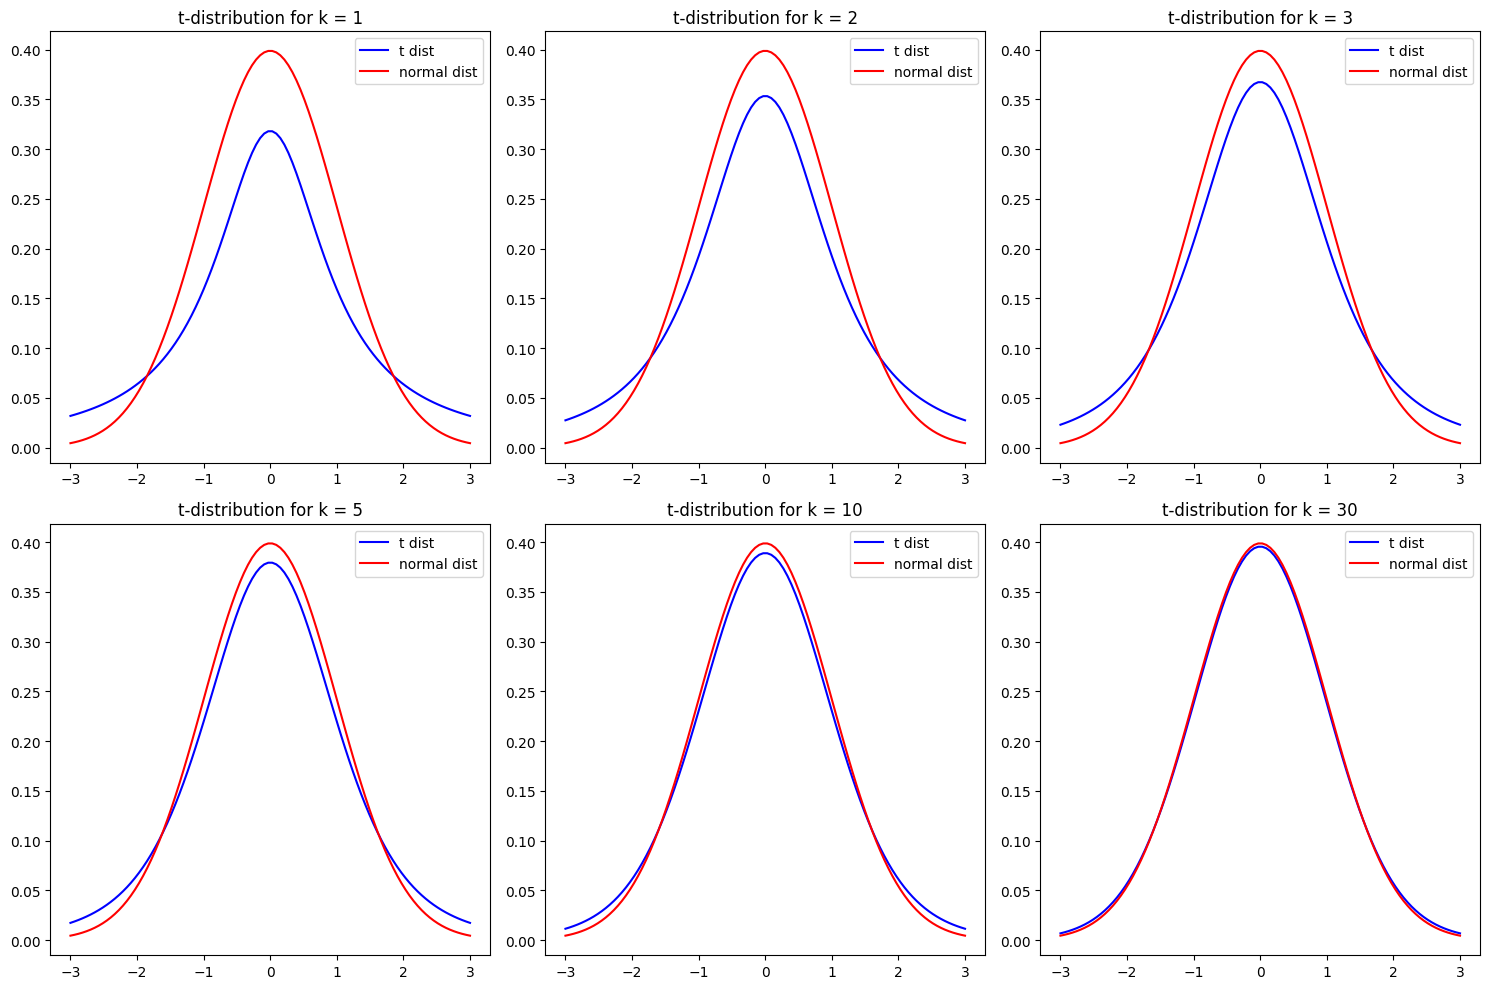

In [8]:
# plot
from scipy.stats import t
from scipy.stats import norm

x = np.linspace(-3,3,100)

fig,axes = plt.subplots(2,3,sharex = False, sharey=False, figsize=(15,10))
axes = axes.ravel()
for i,k in zip(range(6), [1,2,3,5,10,30]):
    ax = axes[i]
    ax.plot(x,t.pdf(x,df=k), color='blue', label='t dist')
    ax.plot(x, norm.pdf(x), color='red', label='normal dist')
    ax.set_title('t-distribution for k = {0}'.format(k))
    ax.legend(loc='upper right', fontsize = 10)
plt.tight_layout()

#### Let's use the t-distribution to construct the confidence interval for the mean when the population standard deviation is unknown.

The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new machine. The mean of the sample is found to be 110 mg and the sample standard deviation is estimated to be 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.

In [13]:
from scipy.stats import t

x_bar, s = 110, 7
n = 50
k = n-1

np.round(t.interval(0.95,df=k, loc=x_bar, scale = s/np.sqrt(n)),2)

array([108.01, 111.99])

#### Insight
* 95% of the time, the mean caffeine content for cups of coffee dispensed by the machine will be between 108.01 mg and 111.99 mg.

#### Key Takeaways

* The confidence interval for the population mean can be constructed for both cases when the population standard deviation is known and when it is unknown. The latter case is more common which demands the application of t-distribution with appropriate degrees of freedom.


* The general approach to the construction of a confidence interval is to use the appropriate sample statistic to estimate the population parameter and use the proper percentile point of the sampling distribution.